# Laboratorio 1 - Preparación y Visualización de Datos

## Entregable 1 - Netflix

Práctica realizada por: Belén Ortega Pérez, José Ignacio Navas Sanz, Paula Hipola Gómez

In [1]:
%reset

import numpy as np                        #Esta libreria nos permite trabajar con numericos
import pandas as pd                       #Pandas nos permite trabajar con datasets y csv
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt           #Las dos librerias anteriores nos permiten pintar las funciones
from sklearn import preprocessing         #Nos sirve para normalizar los datos

from matplotlib import pyplot as plt 
import seaborn as sns                     #Nos sirve para pintar graficas o ilustrar la matriz de confusion 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 2.1- Confirma o desmiente la hipótesis de que las series han desbancado a las películas en la oferta de Netflix.
### 2.1.1- (1 punto) Encuentra el número de películas vs número de series disponibles totales ¿Qué porcentaje del contenido representa cada categoría? Muéstralo en un gráfico justificando la elección del tipo de gráfico.

In [2]:
#Importamos el dataset
data = pd.read_csv('netflix.csv')
data.head()  

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
tipo = data['type']
pelis = tipo[tipo == 'Movie'].count()
series = tipo[tipo == 'TV Show'].count()
print('Hay\033[1m',pelis,'películas\033[0m VS.\033[1m',series, 'series\033[0m')

Hay 4265 películas VS. 1969 series


**Gráfico**

Hemos selecionado un **_Pie Chart_** ya que en este tipo de gráfico podemos distinguir de una manera mas visual la cantidad de películas o series que hay en la plataforma. Además nos muestra los porcentajes.

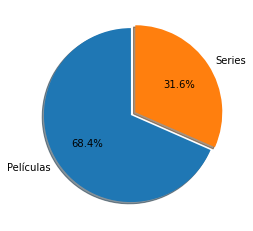

In [4]:
#Pie chart
labels = 'Películas', 'Series'
sizes = [pelis, series]
explode = (0, 0.06)  # El 0.06 lo que hace es extraer un trozo del pie chart 
                     #para una fácil distinción, en este caso es el total de series que hay en Netflix

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

### 2.1.2- (1 punto) Estudia el número de películas vs número de series disponibles por año de publicación en Netflix. Para eso, crea un gráfico que muestre la evolución temporal (por años) de la cantidad de series y de películas disponibles en la plataforma. Justifica el gráfico elegido y explica la tendencia que observas en los datos. ¿Qué conclusión puedes extraer?

In [5]:
# Primero debemos saber cuan limpio está el dataset. Para esto sacamos el número de datos duplicados y de missing
# values por atributo

print('Missing values en el dataset \033[1mANTES\033[0m de realizar la limpieza')
missing_data = data.isnull().sum()
print(missing_data)

Missing values en el dataset ANTES de realizar la limpieza
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [6]:
duplicated_data = data.duplicated().sum()
print('Datos duplicados en el dataset \033[1mANTES\033[0m de realizar la limpieza:', duplicated_data)

Datos duplicados en el dataset ANTES de realizar la limpieza: 0


Nos damos cuenta que la variable a estudiar es _date_added_ ya que contiene la información de cuándo fueron dadas de alta tanto las películas como las series en la plataforma. 
Al estudiar la limpieza de los datos, averiguamos que hay 11 películas o series que no contienen información respecto al día que fueron añadidas a la plataforma. 

In [7]:
p_missing_values = (data['date_added'].isnull().sum()*100)/(pelis+series)
p_missing_values = str(round(p_missing_values, 2))
print('Los valores sin información de fecha añadida a la plataforma representan el\033[1m',p_missing_values,'%\033[0m del dataset')

Los valores sin información de fecha añadida a la plataforma representan el 0.18 % del dataset


Al ser tan pocos los valores que no contienen información respecto a la fecha de alta en la plataforma, los eliminamos.

In [8]:
dc = data[data['date_added'].notna()]

missing_data = dc.isnull().sum()
print('Missing values en el atributo date_added:',missing_data['date_added'])

Missing values en el atributo date_added: 0


In [9]:
#Para poder utilizar el año en el que se añadieron las series y películas a Netflix primero debemos convertir el
#atributo 'date_added' a string para poder sustraer solo el año

years = dc['date_added'].apply(str).str[-4:]

years = np.sort(years.unique())

pelisTotales = 0
seriesTotales = 0
numAnios = 0;

arrayPelis = []
arraySeries = []

for year in years:
    pelisPorAnio = dc[(tipo == 'Movie') & (dc['date_added'] == year)]
    seriesPorAnio = dc[(tipo == 'TV Show') & (dc['date_added'] == year)]
    pelisTotales += pelisPorAnio.shape[0]
    seriesTotales += seriesPorAnio.shape[0]
    arrayPelis.append(pelisPorAnio.shape[0])
    arraySeries.append(seriesPorAnio.shape[0])
    numAnios += 1

<ipython-input-9-4b63a2a63eb5>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pelisPorAnio = dc[(tipo == 'Movie') & (dc['date_added'] == year)]
<ipython-input-9-4b63a2a63eb5>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seriesPorAnio = dc[(tipo == 'TV Show') & (dc['date_added'] == year)]


In [10]:
print(years)
print(arrayPelis)
print(arraySeries)

['2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017'
 '2018' '2019' '2020']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


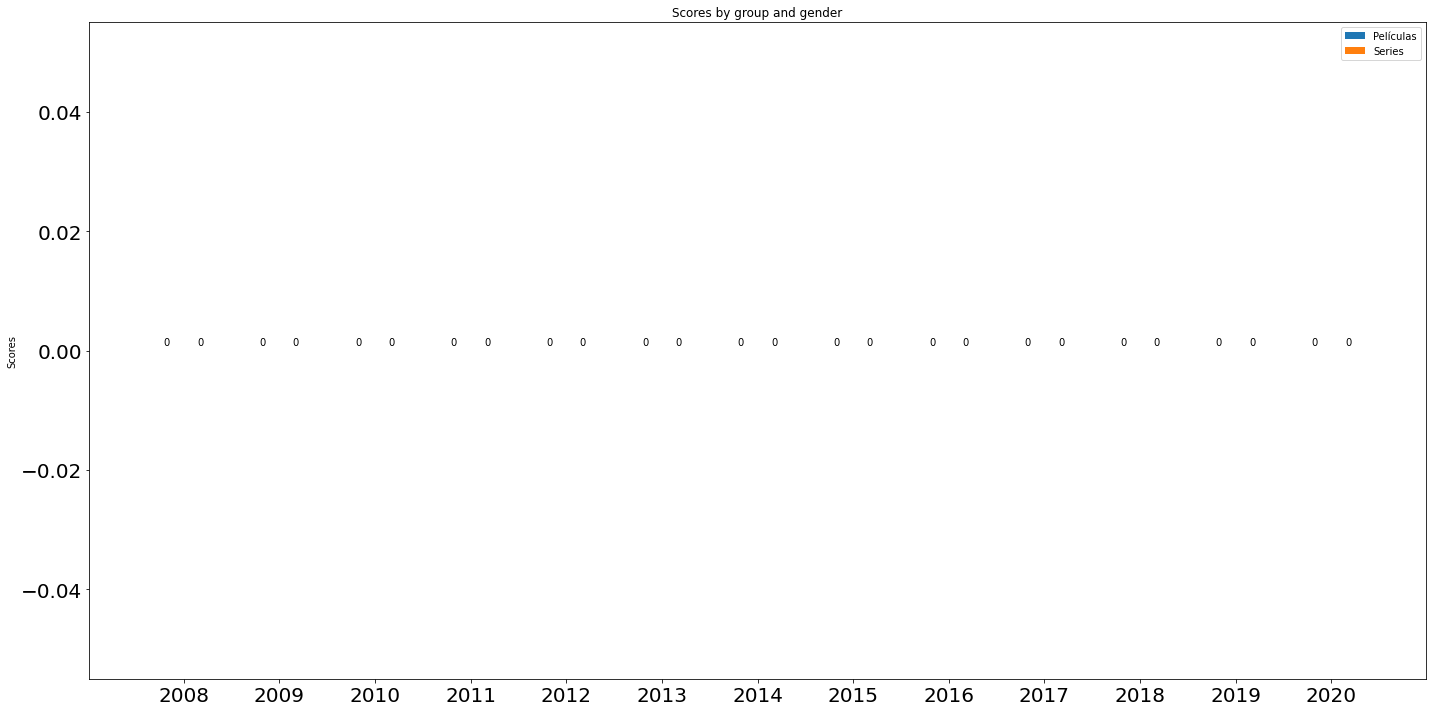

In [13]:

x = np.arange(len(years))   # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, arrayPelis, width, label='Películas')
rects2 = ax.bar(x + width/2, arraySeries, width, label='Series')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.rc('xtick', labelsize=20) 
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

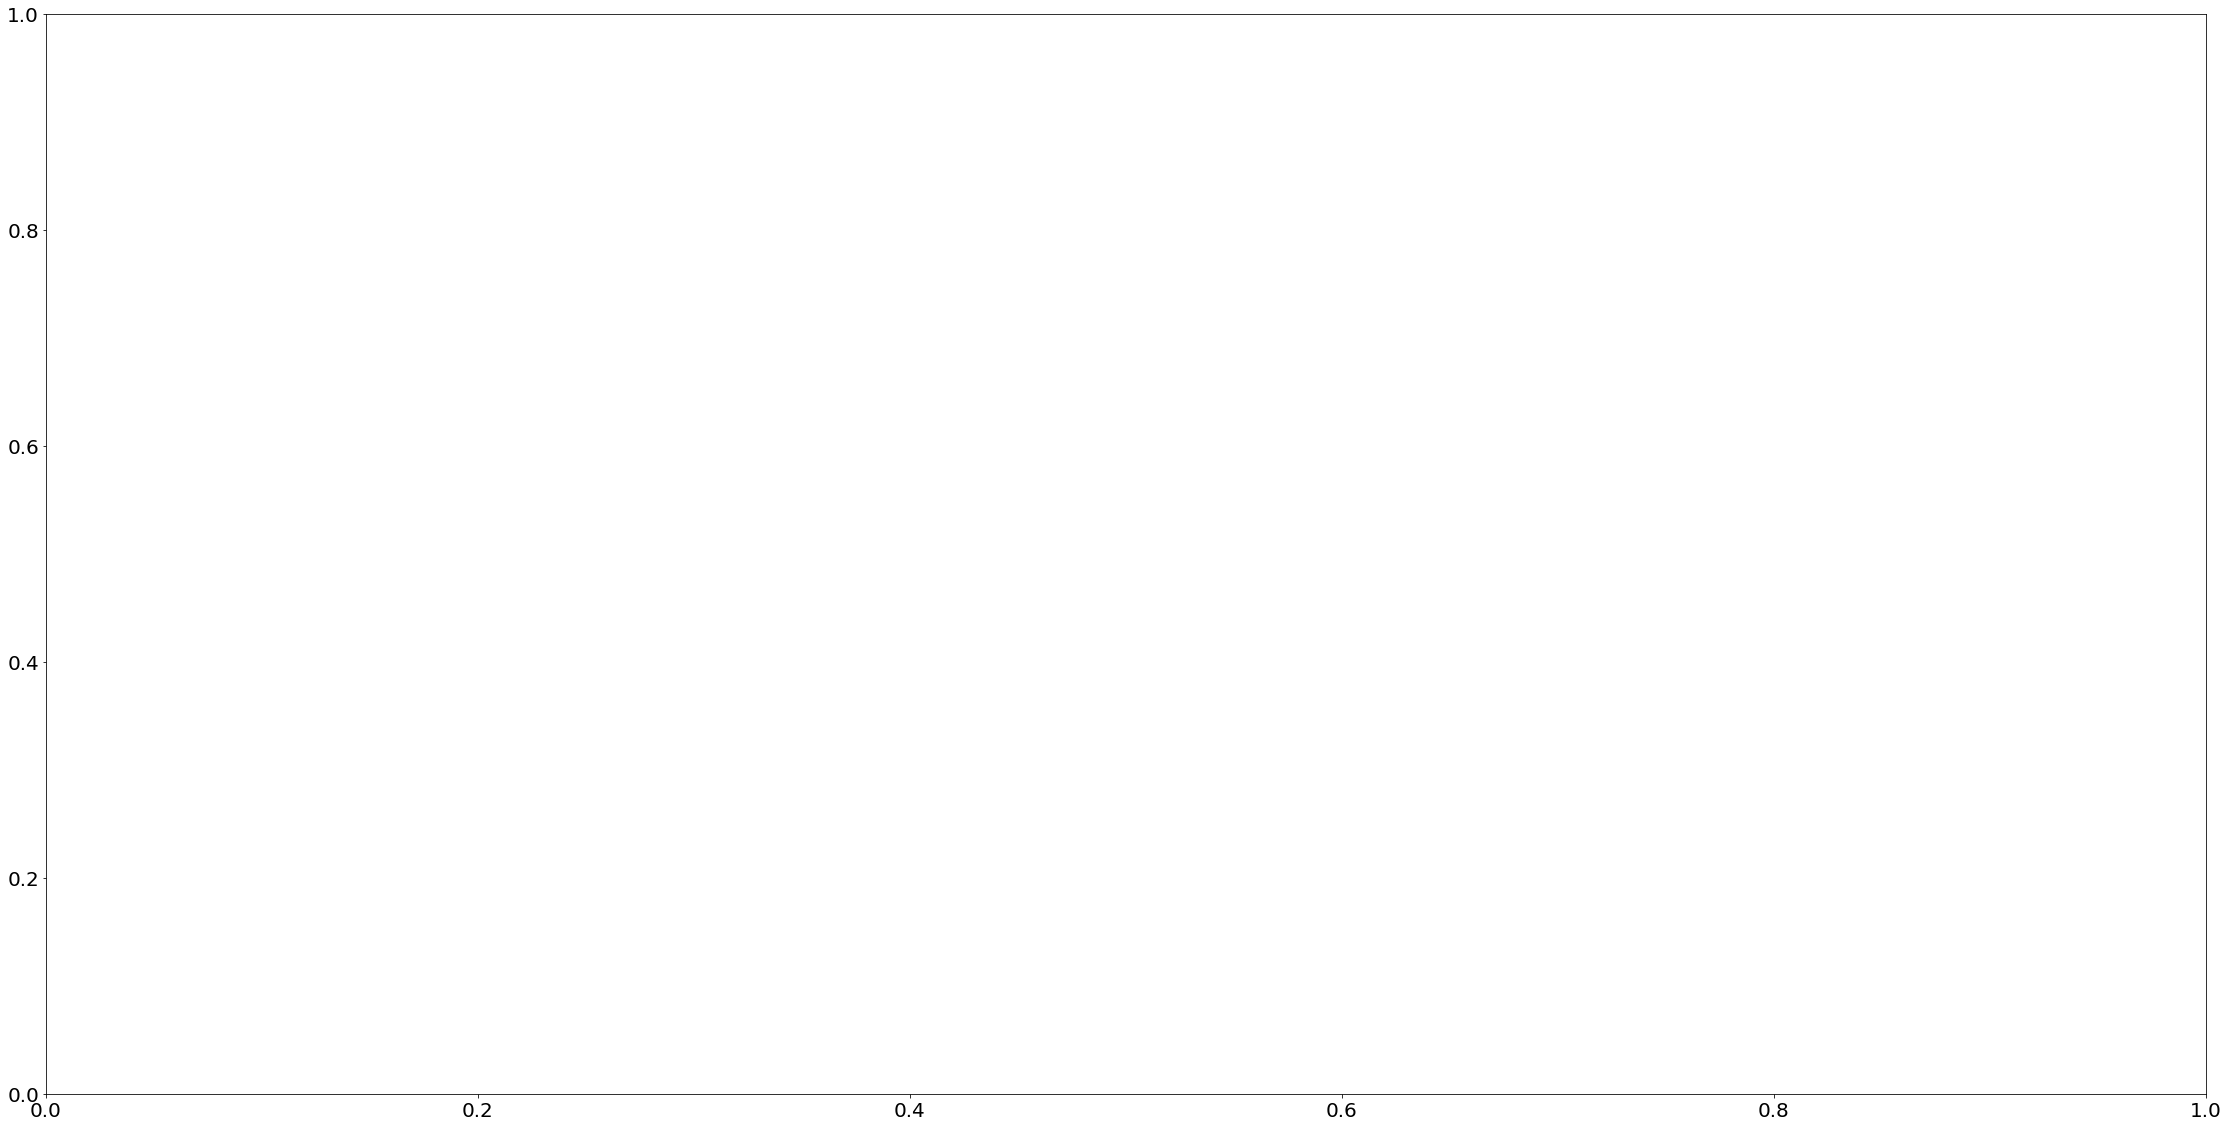

In [12]:
#Gráfico
figura = plt.figure(figsize=(30, 15))
axis = figura.add_axes([0,0,1,1])
x_axis = years.index
y_axis = pelisTotales.values
axis.bar(x_axis, y_axis, label="Missing values")
#Propiedades del gráfico
plt.title('Nº de missing values por atributo')
plt.rc('xtick', labelsize=15)
plt.legend(loc='best')                    #Leyenda
plt.show()

In [ ]:
#Gráfico
figura = plt.figure(figsize=(30, 15))
axis = figura.add_axes([0,0,1,1])
x_axis = data['']
y_axis = missing_data2.values
axis.bar(x_axis, y_axis, label="Missing values")
#Propiedades del gráfico
plt.title('Nº de missing values por atributo')
plt.rc('xtick', labelsize=15)
plt.legend(loc='best')                    #Leyenda
plt.show()